# importing directory

In [ ]:
import numpy as np

In [18]:
import pandas as pd

In [19]:
import seaborn as sns

In [20]:
import matplotlib.pyplot as plt

In [46]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans

In [21]:
## Load the file into a DataFrame
df=pd.read_csv("spotify dataset.csv")

# data pre-processing 

In [22]:
df.shape

(32833, 23)

In [23]:
# Check for missing values
df. head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

In [27]:
# Check for missing values
df.isnull().sum() 

track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

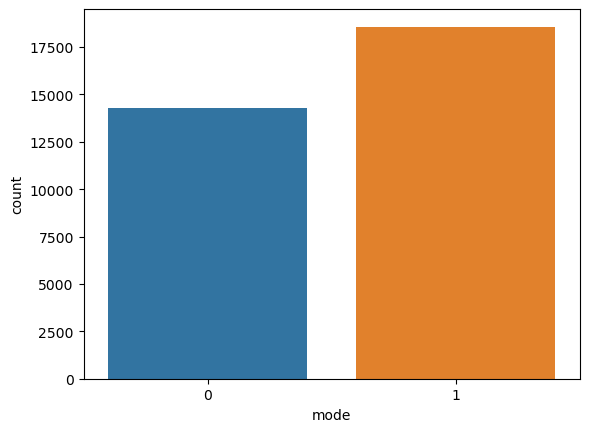

In [28]:
sns.countplot(x="mode",data=df)
plt.show

Text(0.5, 1.0, 'genres')

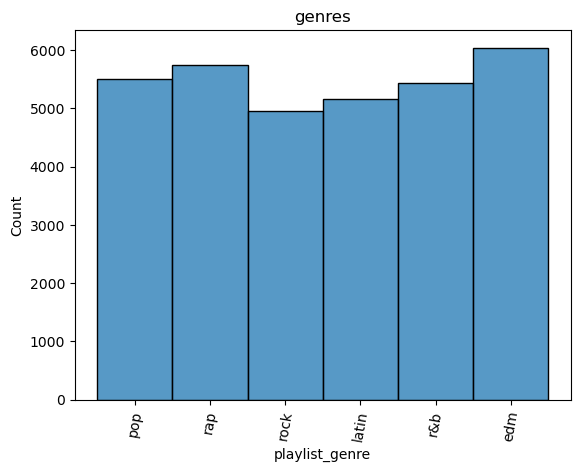

In [32]:
sns.histplot(df["playlist_genre"])
plt.xticks(rotation=80)
plt.title("genres")

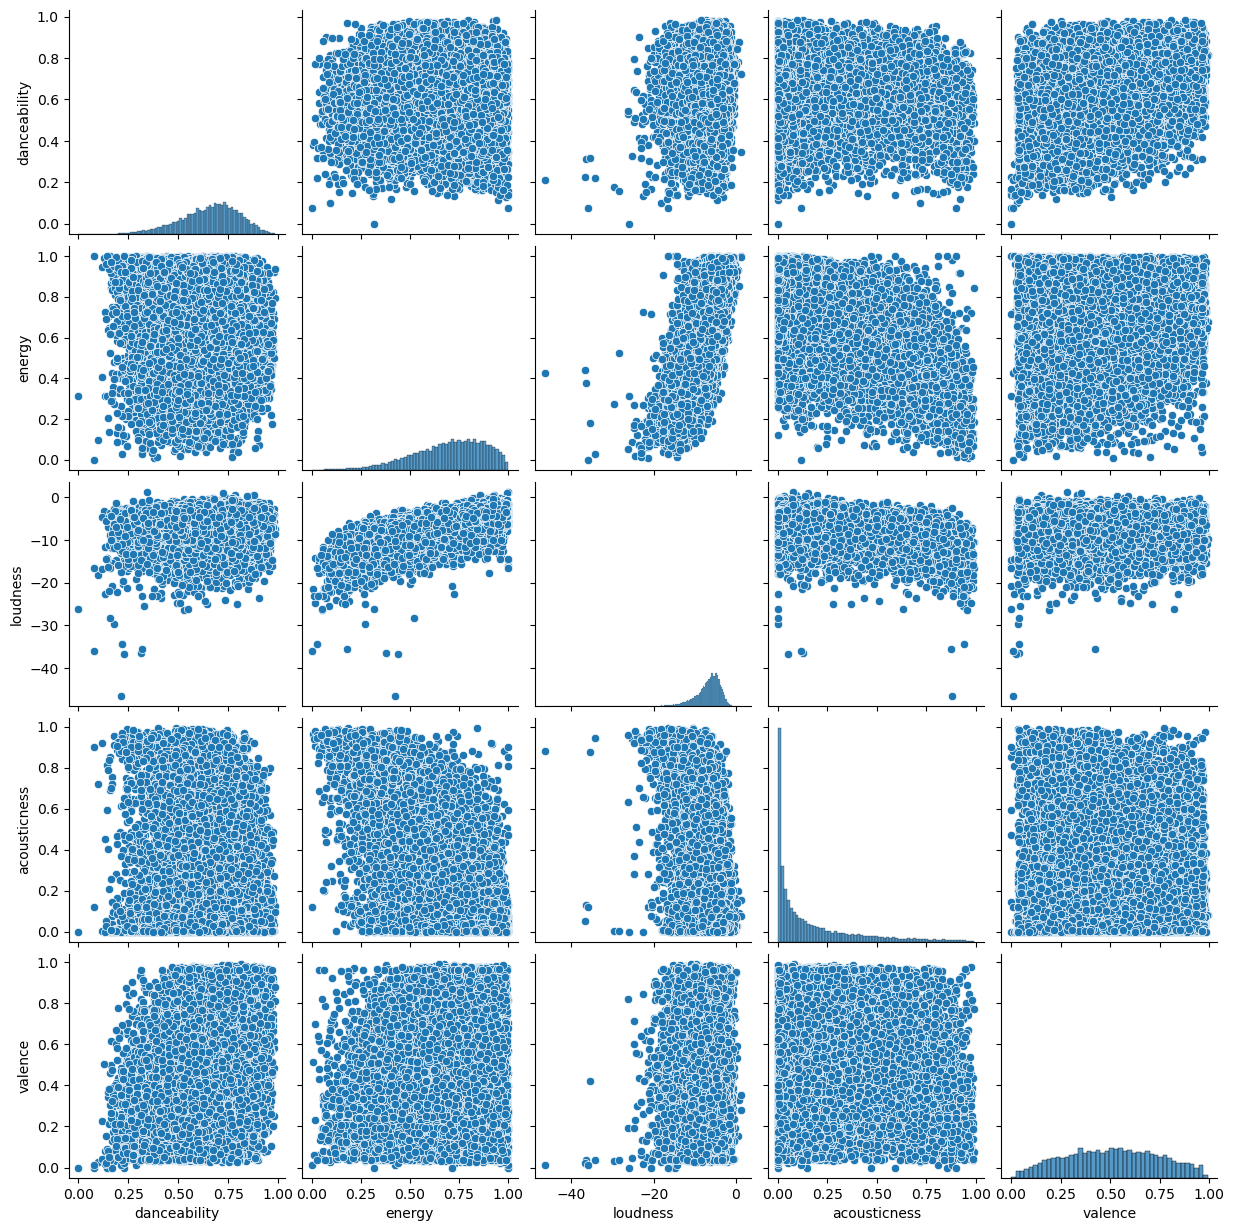

In [35]:
#pair plot
sns.pairplot(df[['danceability', 'energy', 'loudness', 'acousticness', 'valence']])
plt.show()

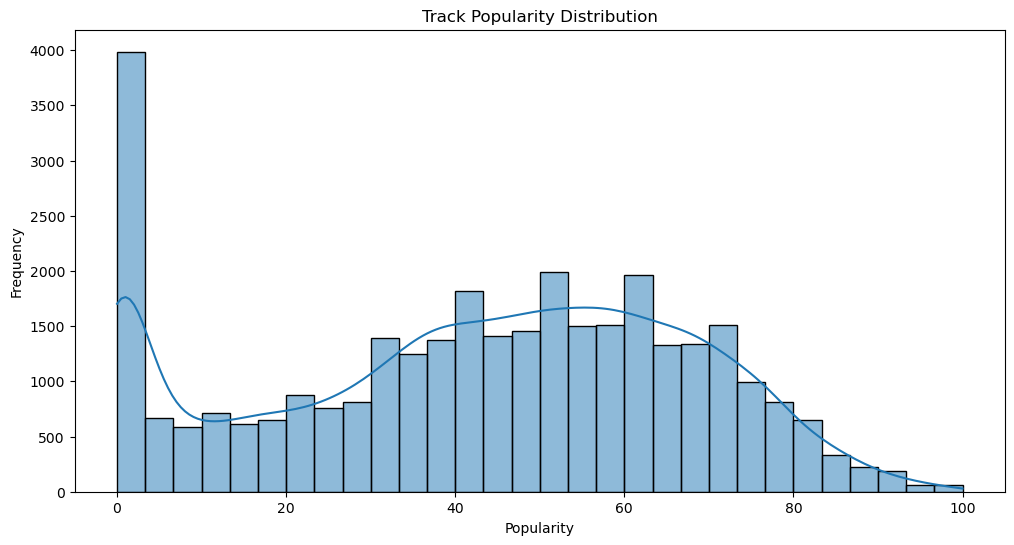

In [36]:
#historgam
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='track_popularity', bins=30, kde=True)
plt.title('Track Popularity Distribution')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()

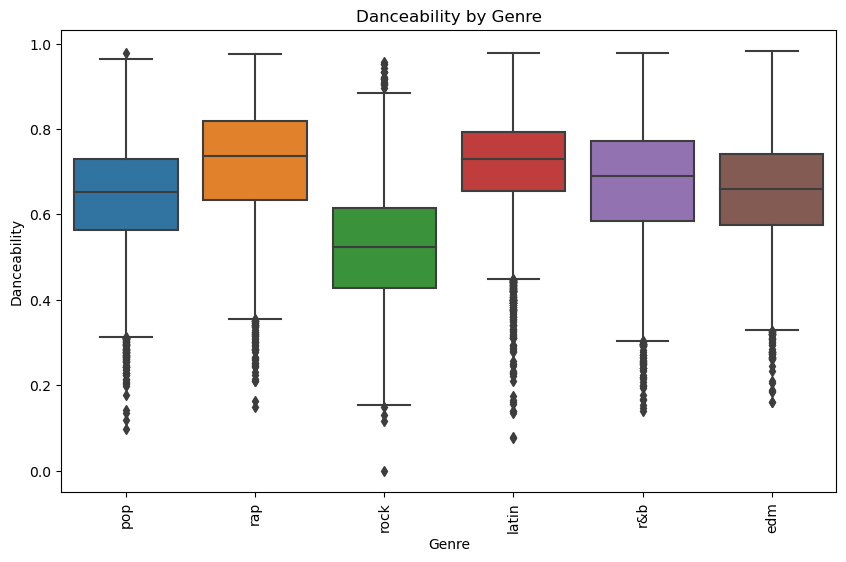

In [37]:
#box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='playlist_genre', y='danceability')
plt.title('Danceability by Genre')
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('Danceability')
plt.show()

/tmp/ipykernel_39722/1536539757.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


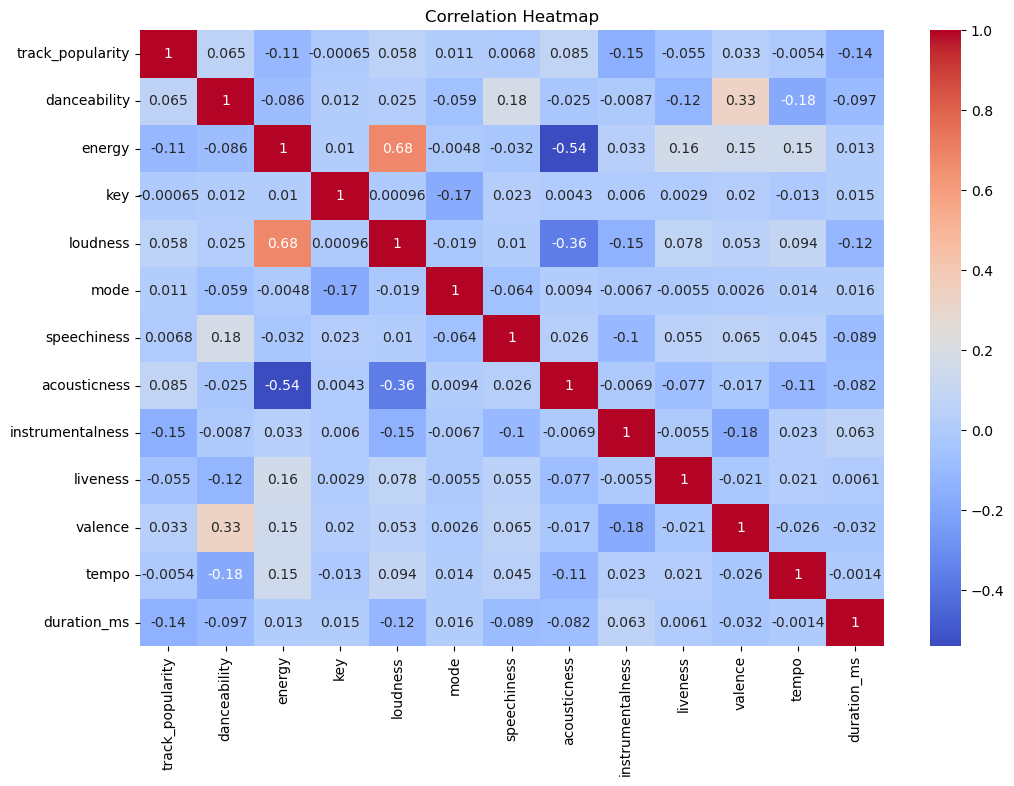

In [38]:
#correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


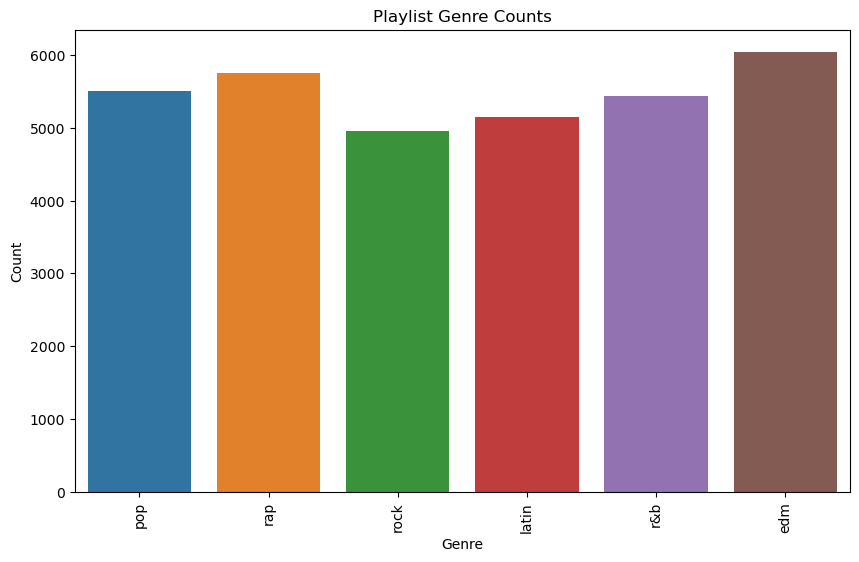

In [39]:
#bar plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='playlist_genre')
plt.title('Playlist Genre Counts')
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

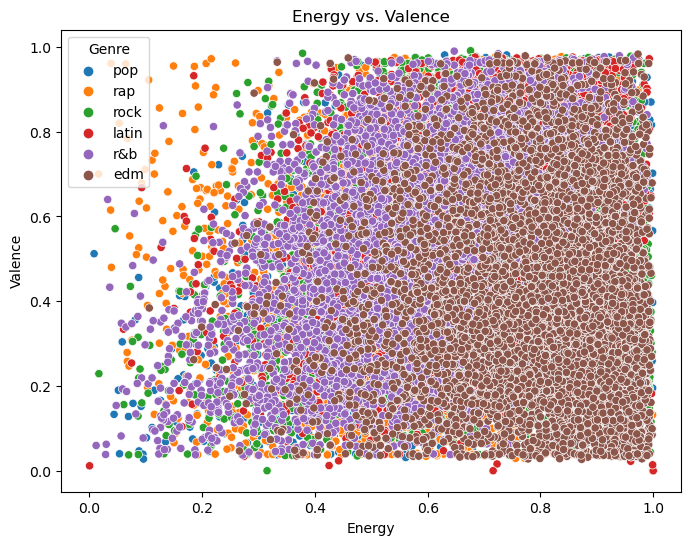

In [40]:
#scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='energy', y='valence', hue='playlist_genre')
plt.title('Energy vs. Valence')
plt.xlabel('Energy')
plt.ylabel('Valence')
plt.legend(title='Genre')
plt.show()

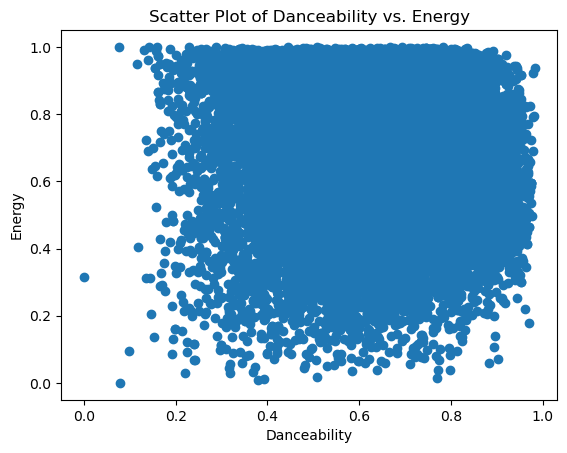

In [43]:
plt.scatter(df['danceability'], df['energy'])
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.title('Scatter Plot of Danceability vs. Energy')
plt.show()

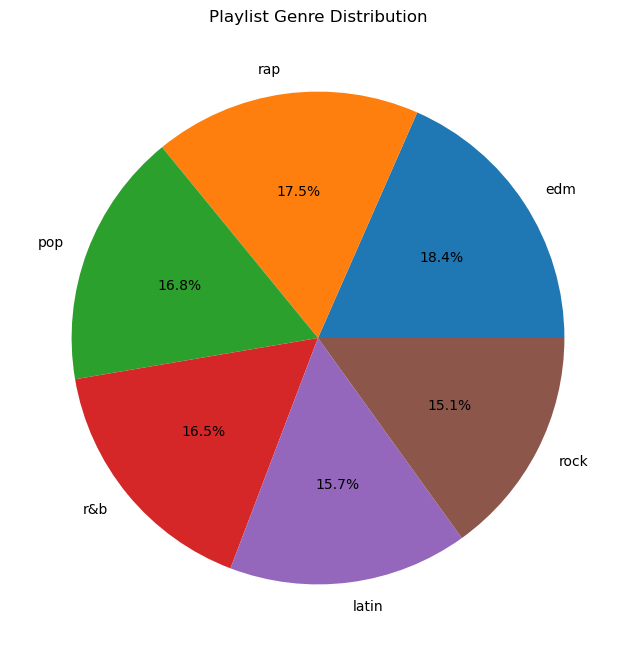

In [41]:
# pie charts
df['playlist_genre'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))
plt.title('Playlist Genre Distribution')
plt.ylabel('')
plt.show()

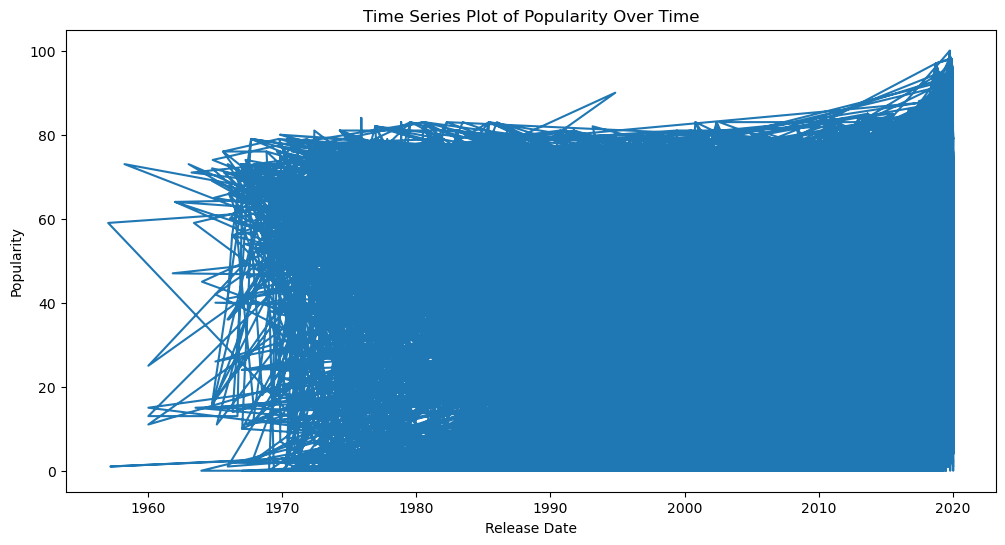

In [42]:
#time series plots
df['track_album_release_date'] = pd.to_datetime(df['track_album_release_date'])
plt.figure(figsize=(12, 6))
plt.plot(df['track_album_release_date'], df['track_popularity'])
plt.xlabel('Release Date')
plt.ylabel('Popularity')
plt.title('Time Series Plot of Popularity Over Time')
plt.show()

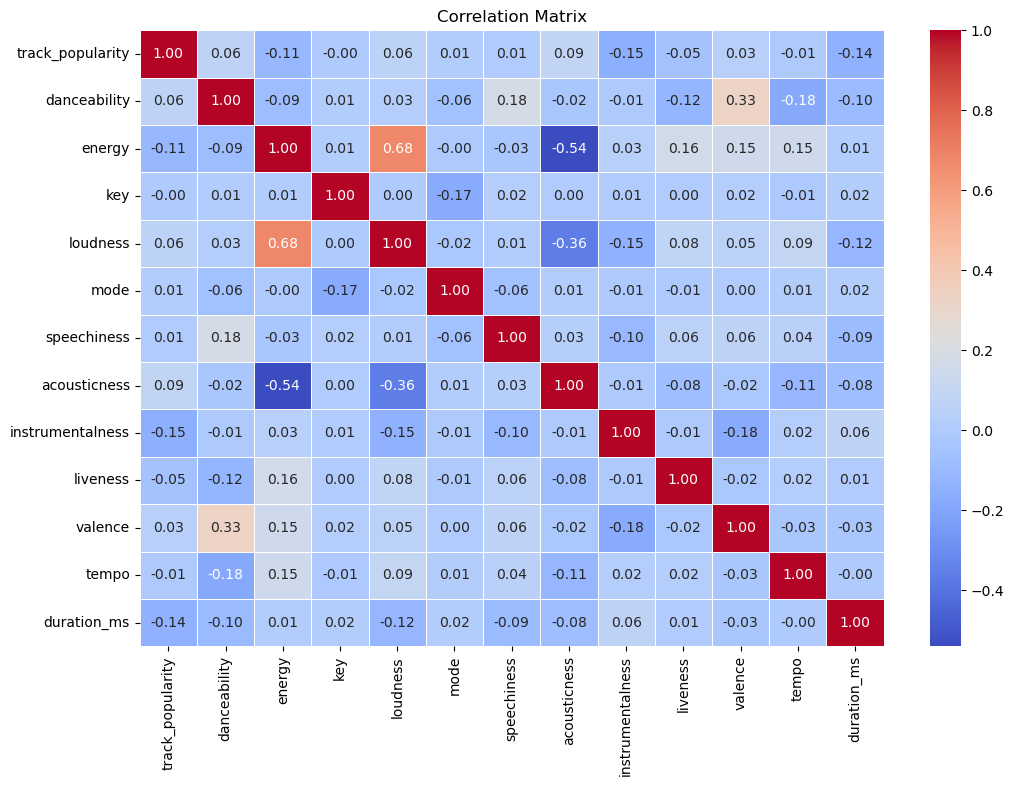

In [44]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [48]:
# Encode categorical variables
label_encoder = LabelEncoder()
df['playlist_genre_encoded'] = label_encoder.fit_transform(df['playlist_genre'])
df['playlist_name_encoded'] = label_encoder.fit_transform(df['playlist_name'])

# Standardize numerical features
scaler = StandardScaler()
num_features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']
df[num_features] = scaler.fit_transform(df[num_features])

# Select the features for clustering
X = df[['playlist_genre_encoded', 'playlist_name_encoded'] + num_features]


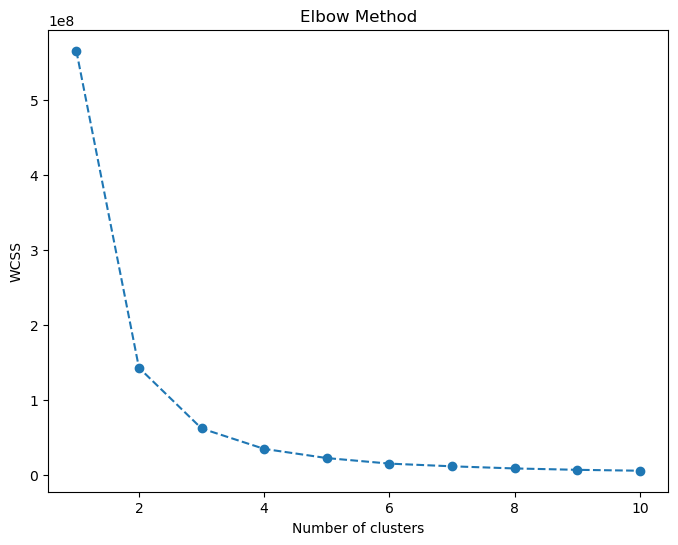

In [49]:
#determine the number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the Elbow method graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [50]:
#Choosing the optimal number of clusters and perform clustering
n_clusters = 3

# Perform KMeans clustering
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
df['cluster'] = kmeans.fit_predict(X)


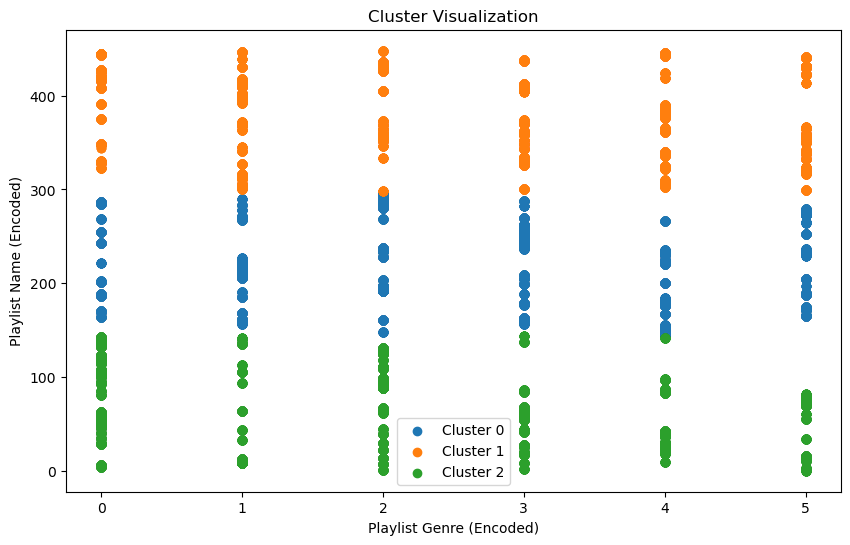

In [51]:
# Visualize the clusters
# Scatter plot for 'playlist_genre_encoded' vs 'playlist_name_encoded'
plt.figure(figsize=(10, 6))
for i in range(n_clusters):
    cluster_df = df[df['cluster'] == i]
    plt.scatter(cluster_df['playlist_genre_encoded'], cluster_df['playlist_name_encoded'], label=f'Cluster {i}')
plt.title('Cluster Visualization')
plt.xlabel('Playlist Genre (Encoded)')
plt.ylabel('Playlist Name (Encoded)')
plt.legend()
plt.show()


In [52]:
df['cluster'] = kmeans.labels_


In [53]:
user_cluster = 1 

# Filter playlists from the same cluster as the user's preferences
recommended_playlists = df[df['cluster'] == user_cluster]['playlist_name'].unique()

# Display the recommended playlists
print("Recommended Playlists:")
for playlist in recommended_playlists:
    print(playlist)

Recommended Playlists:
Todo Éxitos
Ultimate Indie Presents... Best Indie Tracks of the 2010s
TUNES DANCE AND POP
The Sound of Post-Teen Pop
post-teen alternative, indie, pop (large variety)
🤩🤪Post Teen Pop🤪🤩
Someone You Loved Lewis Capaldi (Pop Music Mix)
a taste of the mainstream
post teen pop
Post-teen pop
post-teen pop
This Is: Javiera Mena
This Is Janelle Monáe
The Sound of Indie Poptimism
The Edge of Indie Poptimism
indie poptimism🕺🏻
The Pulse of Indie Poptimism
random playlist that can't decide its genre so go ahead jam along with these catchy tunes
indie poptimism
RapCaviar
RAP 91
This Is Logic
Rap Workout
Southern Hip Hop
Southern California Hip Hop Primer
Viral Southern Hip Hop
◤ Hip Hop Dance Music – Urban – Trap – Breaking Locking Popping Bopping – WOD – World of Dance
The Sound of Southern Hip Hop
Southern Soul BBQ Mix
🔥💵 Hip Hop, Rap, Heavy 808's - New School
Southern soul & hip hop
Russian Gangster Rap
RAP Gangsta
RUSSIAN Gangster Rap
Rap Party 24/7 Radio / Gangsta Rap
Zo